## Week 2: exploring texture for traffic sign detection


When selecting an approach for feature extraction in image, we should ask ourselves what type of information do we think is useful. The task is to find a feature that is useful for separating the traffic sign (and possibly other foreground objects) from the background. 

The main type of features we will talk about is features that describe: 
- Intensity
- Color
- Edges
- Texture
- Shape

Consider a sample image:
<img src="images/pedestrian_001.png">

Is texture, as described by local graylevel variations, believed to be useful? That is not totally clear, but we will try. 

Texture is dependent on the scale we look at, and a texel is said to be the basic element in describing the graylevel variations.  Is there a basic element in the traffic sign regions? Could there be something with the colored border around some of the signs?

The window size in texture computation must be related to the texel size, but also to the general size of the objects we want to separate from the background. In the following, experiment with both large and smaller windows. 
    
<img src="images/pedestrian_006.png">
<img src="images/crossing_008.png">


Assume that your downloaded images are in subfolder /images. 
Read some of the images, e.g. bike_004.png.


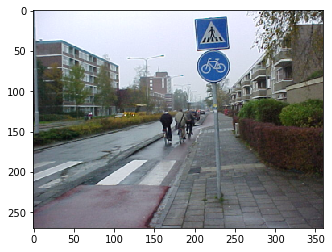

In [1]:
from imageio import imread

import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
imfile = "images/bike_001.png"
im1 = imread(imfile)
#img=mpimg.imread('your_image.png')
imgplot = plt.imshow(im1)
plt.show()
import matplotlib.cm as cm
grayimage = (0.3*im1[:,:,0]+0.6*im1[:,:,1]+0.1*im1[:,:,2])

x 20
x 40
x 60
x 80
x 100
x 120
x 140
x 160
x 180
x 200
x 220
x 240
x 260


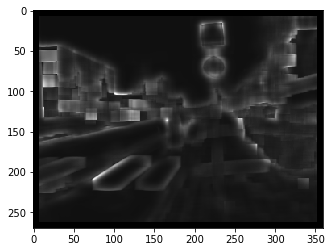

In [7]:
# Implement functions for first-order energy and entropy based on local histograms 
import matplotlib.pyplot as plt
import math
import numpy as np
def hist_features(img, wsize):
    
    hgh,wid = img.shape
    nfeat = 5
    enerim = np.zeros((hgh,wid,nfeat))
    w2 = wsize // 2
    
    for x in range(w2, hgh-w2):
        if x % 50 == 0:
            print("row: ",x)
        for y in range(w2, wid-w2):
            
            lhist = np.histogram(img[x-w2:x+w2,y-w2:y+w2].ravel(),bins=256)
            
            ener = -np.sum(lhist[0]*lhist[0])
            var = 0
            std = 0
            skew = 0
            kurt = 0
            ener=0
         
            hind = lhist[1][0:256]
            mu = np.mean(lhist[1][0:256]*lhist[0])
            var = np.sum((hind-mu)*(hind-mu)*lhist[0])
            rest = 1-1/(1+var)
            std = np.sqrt(var)
            skew = np.sum(np.power((hind-mu),3)*lhist[0])/(std*std*std)
            #skew = np.sum((hind-mu)*(hind-mu)*(hind-mu)*lhist[0])/(std*std*std)
            kurt = np.sum(np.power(hind-mu,4)*lhist[0])/(var*var)
            ener = -np.sum(lhist[0]*lhist[0])
            enerim[x,y,0]= mu
            enerim[x,y,4] = ener
            enerim[x,y,1] = var
            enerim[x,y,2] = skew
            enerim[x,y,3] = kurt
            
            
    return(enerim)

energy_im = hist_features(grayimage, 15)

plt.imshow(energy_im[:,:,3],cmap=cm.gray)
#plt.imshow(energy_im[:,:,1],cmap=cm.gray)
#plt.imshow(energy_im[:,:,2],cmap=cm.gray)
#plt.imshow(energy_im[:,:,3],cmap=cm.gray)           

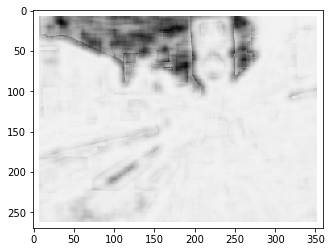

In [3]:
plt.imshow(energy_im[:,:,4],cmap=cm.gray)